In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
mkdir dwdmlab

In [ ]:
!unzip /content/drive/MyDrive/braintumordataset.zip -d /content/drive/MyDrive/dwdmlab

Archive:  /content/drive/MyDrive/braintumordataset.zip
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/drive/MyDrive/dwdmlab/Testing/gl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2

In [ ]:
train_path = '/content/drive/MyDrive/dwdmlab/Training'
test_path = '/content/drive/MyDrive/dwdmlab/Testing'

In [ ]:
X_train = []
y_train = []
img_size = (300,300)

In [ ]:
for folder in os.listdir(train_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(train_path,folder)):
        img_path = os.path.join(train_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: glioma_tumor
In folder: meningioma_tumor
In folder: no_tumor
In folder: pituitary_tumor


In [ ]:
for folder in os.listdir(test_path):
    print(f"In folder: {folder}")
    for file in os.listdir(os.path.join(test_path,folder)):
        img_path = os.path.join(test_path,folder,file)
        img  = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        X_train.append(img)
        y_train.append(folder)

In folder: glioma_tumor
In folder: meningioma_tumor
In folder: no_tumor
In folder: pituitary_tumor


In [ ]:
X_train = np.array(X_train, dtype='float32')


In [ ]:
X_train = X_train / 255.0


In [ ]:
print(X_train.shape)

(3264, 300, 300, 3)


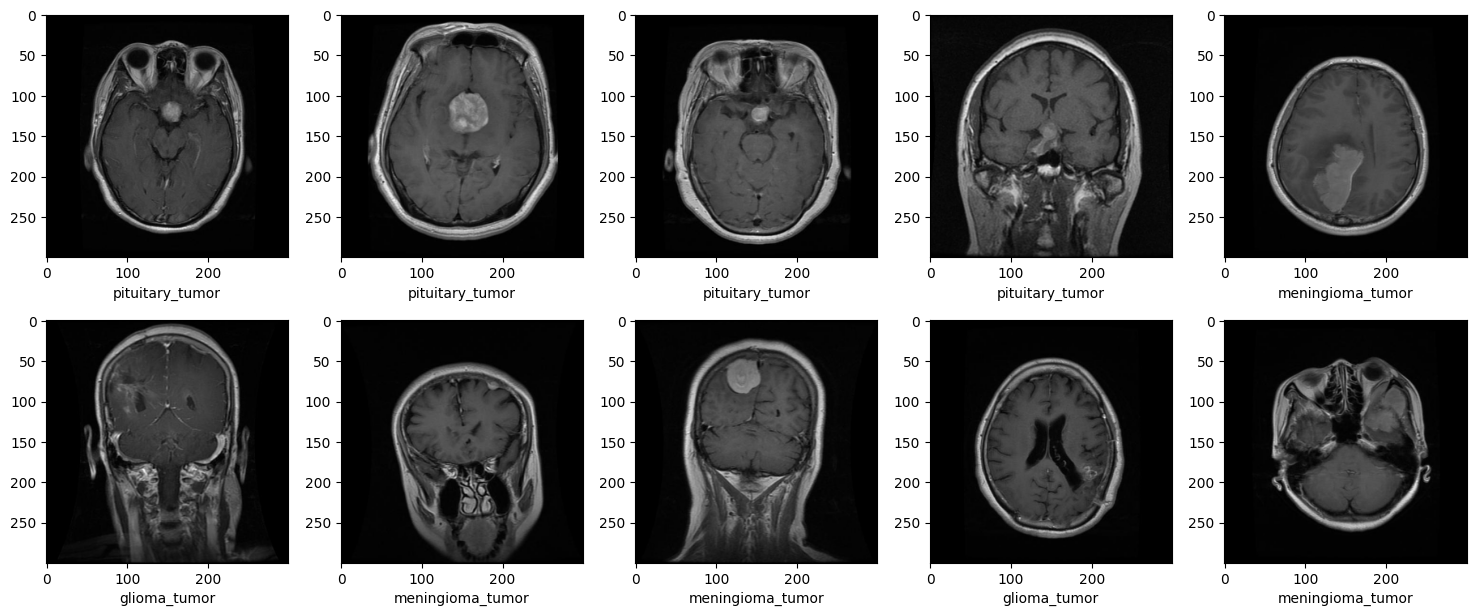

In [ ]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=10, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest')

In [ ]:
datagen.fit(X_train)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
y_train = np.array(pd.get_dummies(y_train))


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_test shape: {(X_test).shape}\n'
      f'y_test shape: {(y_test).shape}\n'
      f'X_valid shape: {(X_valid).shape}\n'
      f'y_valid shape: {(y_valid).shape}')

X_train shape: (2643, 300, 300, 3)
y_train shape: (2643, 4)
X_test shape: (327, 300, 300, 3)
y_test shape: (327, 4)
X_valid shape: (294, 300, 300, 3)
y_valid shape: (294, 4)


In [ ]:
from tensorflow.keras import Sequential, activations
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dense, Resizing, BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = X_train.shape
print(input_shape)


(2643, 300, 300, 3)


In [ ]:
height, width, _ = X_train.shape[1:]
print("Width:", width)
print("Height:", height)

Width: 300
Height: 300


In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential([
    Resizing(32, 32, interpolation='bilinear', input_shape=(width, height, 3)),
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid', input_shape=(width, height, 3)),
    BatchNormalization(),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 6)         24        
 Normalization)                                                  
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 16)        6

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=16,
    verbose=1
)

Epoch 1/10
166/166 [==============================] - 10s 23ms/step - loss: 0.8466 - accuracy: 0.6591 - val_loss: 1.2054 - val_accuracy: 0.5714
Epoch 2/10
166/166 [==============================] - 2s 15ms/step - loss: 0.5484 - accuracy: 0.7877 - val_loss: 0.7858 - val_accuracy: 0.6939
Epoch 3/10
166/166 [==============================] - 3s 16ms/step - loss: 0.3850 - accuracy: 0.8547 - val_loss: 0.5849 - val_accuracy: 0.7721
Epoch 4/10
166/166 [==============================] - 5s 30ms/step - loss: 0.2622 - accuracy: 0.9058 - val_loss: 0.4741 - val_accuracy: 0.8061
Epoch 5/10
166/166 [==============================] - 3s 16ms/step - loss: 0.2054 - accuracy: 0.9315 - val_loss: 0.4618 - val_accuracy: 0.8435
Epoch 6/10
166/166 [==============================] - 2s 15ms/step - loss: 0.1045 - accuracy: 0.9656 - val_loss: 0.4355 - val_accuracy: 0.8639
Epoch 7/10
166/166 [==============================] - 3s 16ms/step - loss: 0.0742 - accuracy: 0.9784 - val_loss: 0.4413 - val_accuracy: 0.867

In [ ]:
loss, acc = model.evaluate(X_valid, y_valid)


10/10 [==============================] - 0s 28ms/step - loss: 0.5064 - accuracy: 0.8469


In [ ]:
print(acc)

0.8469387888908386


In [ ]:
print(loss)

0.506351888179779


In [ ]:
from sklearn.metrics import recall_score


y_test_labels = np.argmax(y_test, axis=1)

# preds on testing data
y_pred = model.predict(X_test)

# Convert to max
y_pred_classes = np.argmax(y_pred, axis=1)

recall = recall_score(y_test_labels, y_pred_classes, average='weighted')

print('Recall Score:', recall)

11/11 [==============================] - 0s 30ms/step
Recall Score: 0.8287461773700305


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       117
           1       0.68      0.93      0.78        84
           2       0.86      0.88      0.87        48
           3       0.95      0.94      0.94        78

    accuracy                           0.83       327
   macro avg       0.85      0.85      0.84       327
weighted avg       0.85      0.83      0.83       327



In [ ]:
class_names = []
for folder in os.listdir(train_path):
    class_names.append(folder)

class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

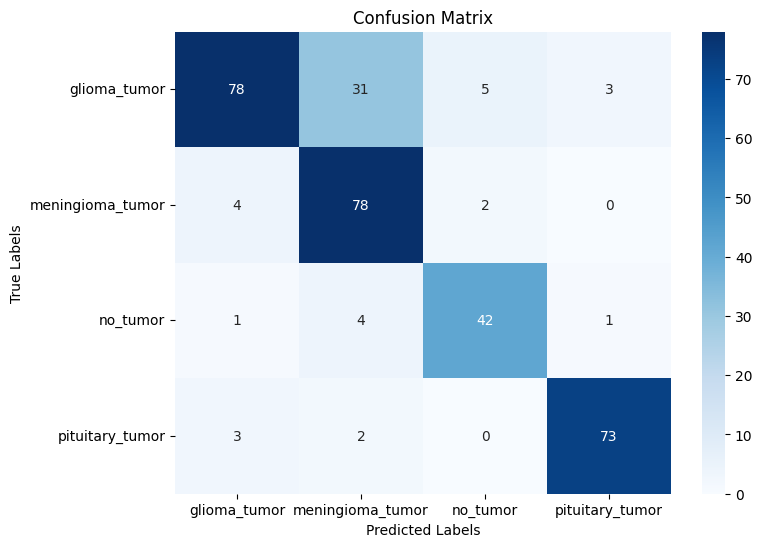

In [ ]:
['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()